In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df1 = pd.read_csv('KIU Russian Officers killed in Ukraine — public full data sheet - Ranks.csv') # https://github.com/simonhuwiler/russo-ukrainian-data-ressources.git
df2 = pd.read_csv('Confirmed Russian losses in Ukraine per week.csv') # https://en.zona.media/article/2025/04/25/casualties_eng-trl

# Russian officer deaths by rank

In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 14 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   6011                                                                                         463 non-null    object
 1   RANKS  RUSSIAN OFFICERS KILLED IN UKRAINE • Follow @KilledInUkraine on Twitter for updates.  1241 non-null   object
 2   Unnamed: 2                                                                                   1529 non-null   object
 3   Unnamed: 3                                                                                   943 non-null    object
 4   Unnamed: 4                                                                                   612 non-null    object
 5   Unnamed: 5                               

In [63]:
# Data from the CSV file
ranks = [
    "Junior Lieutenant", "Lieutenant", "Senior Lieutenant", "Captain", "Major",
    "Lieutenant Colonel", "Colonel", "Major General", "Lieutenant General",
    "Colonel General", "General of the Army", "Other Rank and Unknown Rank",
    "Reserve/Retired Junior Officer", "Reserve/Retired Senior Officer"
]

counts = [
    461, 1238, 1527, 941, 610, 290, 107, 7, 3, 0, 0, 171, 309, 347
]

# Create DataFrame
df1 = pd.DataFrame({
    "Rank": ranks,
    "Count": counts
})

# Sort by count in descending order
df1 = df1.sort_values(by="Count", ascending=False)

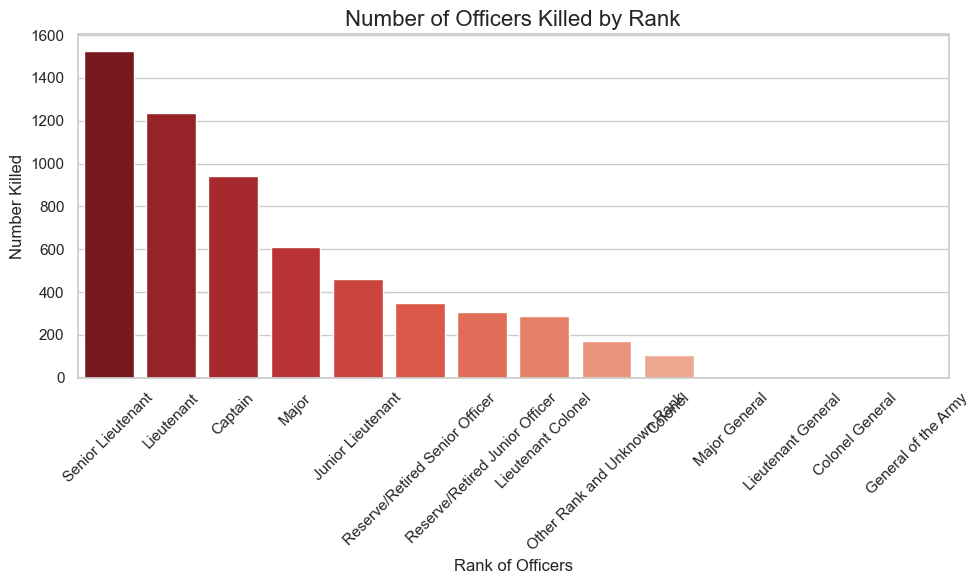

In [93]:
# Set style
sns.set(style="whitegrid")

# Create barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Rank', y='Count', data=df1, palette='Reds_r', legend=False, hue='Rank')

# Add titles and labels
plt.title('Number of Officers Killed by Rank', fontsize=16)
plt.xlabel('Rank of Officers', fontsize=12)
plt.ylabel('Number Killed', fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


# Russian forces losses

In [69]:
# Extract the selected columns
columns_to_extract = ['week_start', 'total', 'vol', 'mob', 'inmates']
df2 = df2[columns_to_extract]

In [87]:
df2.isnull().any()

week_start    False
total         False
vol           False
mob           False
inmates       False
dtype: bool

In [95]:
df2['week_start'] = pd.to_datetime(df2.loc[0, 'week_start'], format='%d.%m.%Y')

In [73]:
df2.sample(10)

,week_start,total,vol,mob,inmates
12,2022-05-19,352,30,0,0
30,2022-09-22,494,107,7,37
58,2023-04-06,576,52,107,205
52,2023-02-23,846,61,127,436
11,2022-05-12,215,41,0,0
159,2025-03-13,49,9,6,1
92,2023-11-30,747,264,107,90
113,2024-04-25,569,236,79,31
41,2022-12-08,639,58,54,359
80,2023-09-07,447,109,90,38


In [75]:
df2.isnull().sum()

week_start    0
total         0
vol           0
mob           0
inmates       0
dtype: int64

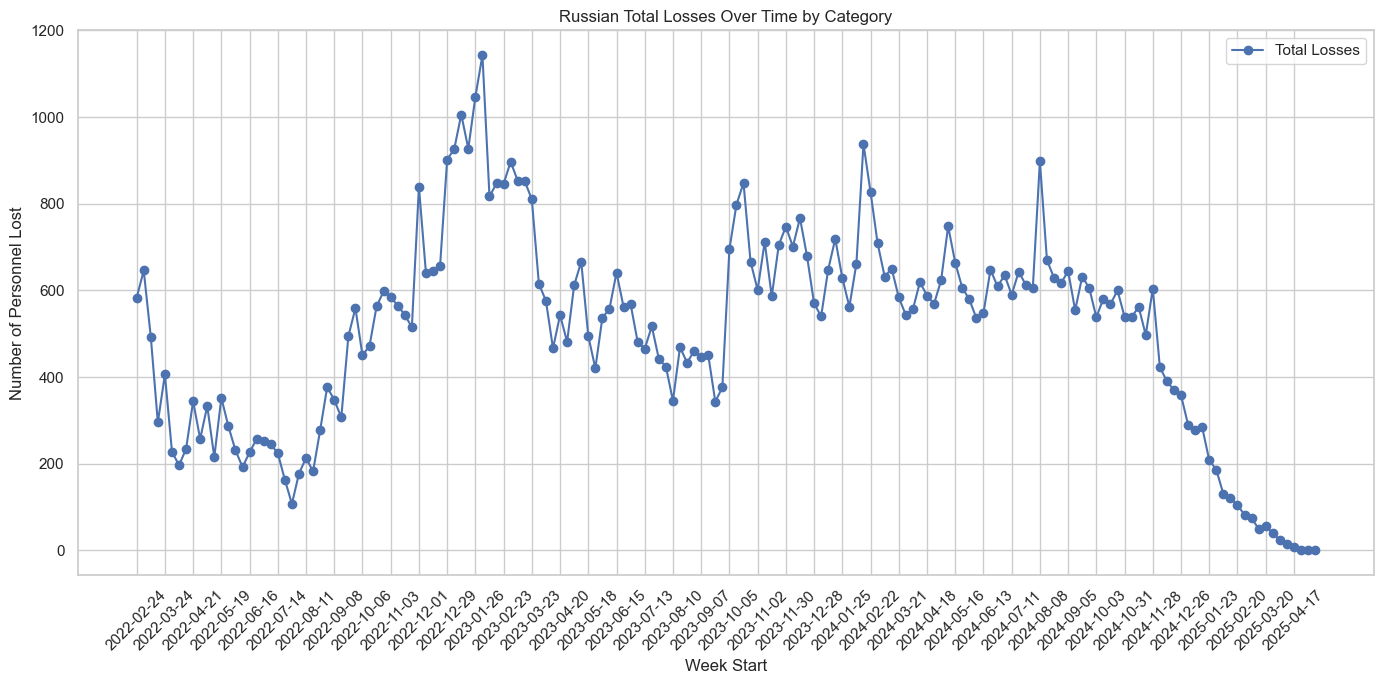

In [77]:
plt.figure(figsize=(14, 7))
plt.plot(df2['week_start'], df2['total'], label='Total Losses', marker='o')
plt.title('Russian Total Losses Over Time by Category')
plt.xlabel('Week Start')
plt.ylabel('Number of Personnel Lost')
plt.legend()
plt.grid(True)

# Pick every 4th date label to show on x-axis
ticks_to_use = df2['week_start'][::4]
plt.xticks(ticks=ticks_to_use, rotation=45)

plt.tight_layout()
plt.show()


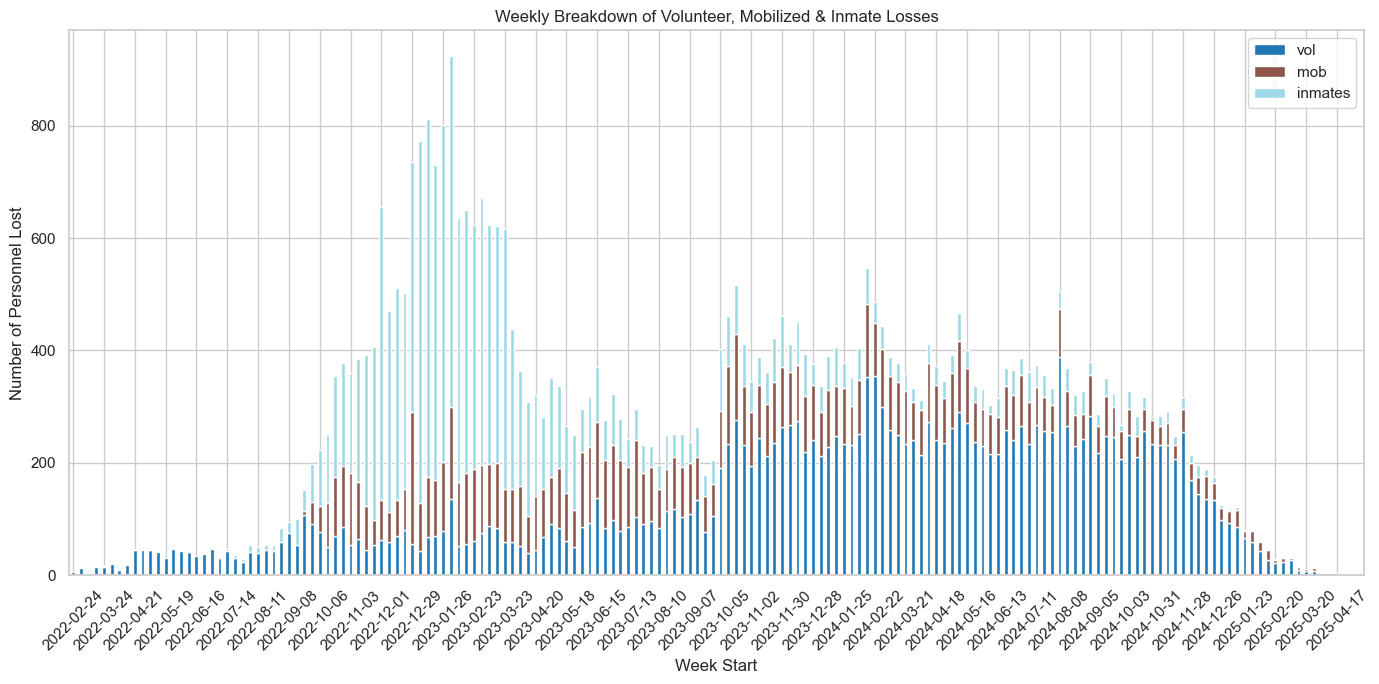

In [79]:
# Set the datetime index
df2_plot = df2.set_index('week_start')

# Plot the stacked bar chart
ax = df2_plot[['vol', 'mob', 'inmates']].plot(
    kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')

# Customize x-ticks to show fewer dates
# Show every 4th label to reduce clumping
ticks_to_show = list(range(0, len(df2_plot), 4))
xticks = [df2_plot.index[i].strftime('%Y-%m-%d') for i in ticks_to_show]

ax.set_xticks(ticks_to_show)
ax.set_xticklabels(xticks, rotation=45)

# Add labels and layout
ax.set_title('Weekly Breakdown of Volunteer, Mobilized & Inmate Losses')
ax.set_xlabel('Week Start')
ax.set_ylabel('Number of Personnel Lost')
plt.tight_layout()
plt.show()

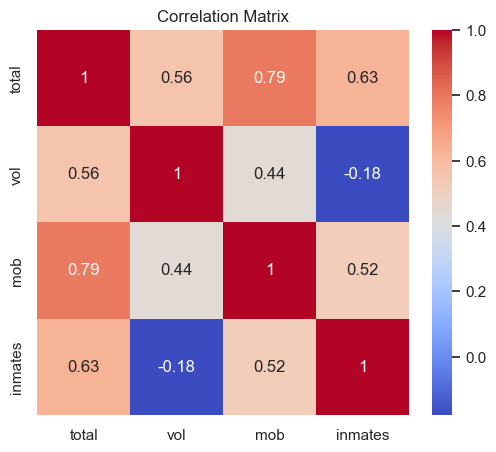

In [81]:

plt.figure(figsize=(6, 5))
sns.heatmap(df2[['total', 'vol', 'mob', 'inmates']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Mobilised troops make up for a large portion of the Russian army.